## Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# 1. Downloading the data

In [2]:
df_january= pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_january.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [3]:
df_fabruary= pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
df_fabruary.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [4]:
df_january.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
df_january_column_amount = len(df_january.columns)
print(f"Dataframe for January has {df_january_column_amount} columns")

Dataframe for January has 19 columns


# 2. Computing duration

In [6]:
duration=(df_january['tpep_dropoff_datetime'] - df_january['tpep_pickup_datetime']).dt.total_seconds()/60
print(f"Standard deviation of the trips duration in Januar: {duration.std()}")

Standard deviation of the trips duration in Januar: 42.59435124195458


# 3. Dropping outliers

<Axes: ylabel='Count'>

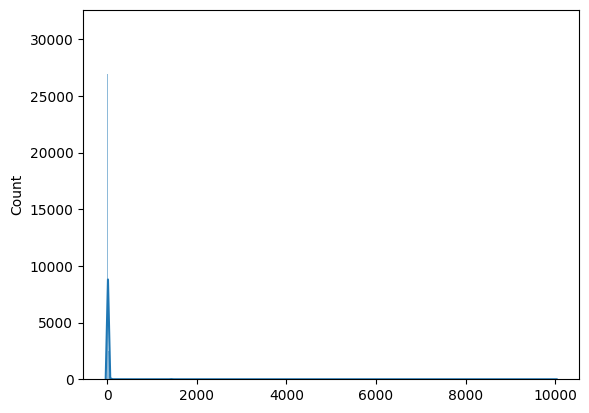

In [7]:
sns.histplot(duration, kde=True)

In [8]:
filtered_duration = duration[(duration > 1) & (duration < 60)]
fraction= len(filtered_duration)/len(duration)*100
print(f"Fraction of the records left after dropping the outliers: {fraction}%")

Fraction of the records left after dropping the outliers: 98.11146334607858%


# 4. One-hot encoding

In [9]:
#method for preprocessing of dataframe
def data_preprocessing(df):
    df['duration']= (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60
    df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
    return df

In [10]:
# method to convert features to dict(for one-hot encoding)
def prepare_dict(df, categorical):
    x_values = df[categorical].astype(str)
    processed = x_values.to_dict(orient='records')
    print('Data frame features converted to dict')
    return processed

In [11]:
df_january = data_preprocessing(df_january)

In [12]:
#select categorical variable
categorical = ['PULocationID', 'DOLocationID']
#process one-hot encoding with dict vectorizer
dv= DictVectorizer()
X_train_dict= prepare_dict(df_january, categorical)
X_train= dv.fit_transform(X_train_dict)
Y_train= df_january['duration']

Data frame features converted to dict


In [13]:
# Count features of one-hot encoding
len(dv.get_feature_names_out())

515

# 5. Training a model

In [14]:
#train Linear Regression model
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [15]:
y_pred= lr.predict(X_train)
mse= root_mean_squared_error(Y_train, y_pred)
print(f"RMSE for train set is: {mse}")

RMSE for train set is: 7.649261934850555


# 6. Evaluating the model

In [16]:
#validation data preprocessing
df_fabruary = data_preprocessing(df_fabruary)
#process one-hot encoding with dict vectorizer
X_val_dict= prepare_dict(df_fabruary, categorical)
X_val= dv.transform(X_val_dict)
Y_val= df_fabruary['duration']

Data frame features converted to dict


In [17]:
#predict on validation set
y_val_pred= lr.predict(X_val)
mse= root_mean_squared_error(Y_val, y_val_pred)
print(f"RMSE for train set is:{mse}")

RMSE for train set is:7.811817745843695
